<a href="https://colab.research.google.com/github/XuechengWu/mask_RCNN/blob/main/Run_Mask_RCNN_on_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Google Drive append**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 获取分享链接

# 测试图zip-dropbox： https://www.dropbox.com/s/ftzyi2x8bhyuc98/colabDataset.zip?dl=0

# 点h5.zip-dropbox： https://www.dropbox.com/s/jm2nyag5a7zzsxn/mask_rcnn_object_0005.zip?dl=0

# Pysource -> Mask_RCNN_basic_1.zip: https://www.dropbox.com/s/4idyigll9zsqxg6/Mask_RCNN_basic_1.zip?dl=0
#  https://dl-web.dropbox.com/s/4idyigll9zsqxg6/Mask_RCNN_basic_1.zip


# Dropbox 直链方法

# https://www.dropbox.com/s/qtikk8ob8fx1n7g/Agatha.zip?dl=0

# 一：将 www 替换成 dl-web

# 二：将尾端 ?dl=0 删除掉

# 然后我们就得到了直链地址：

# https://dl-web.dropbox.com/s/qtikk8ob8fx1n7g/Agatha.zip


# **2. Download .h5-zip and imageDataSet-zip**

In [3]:
# point_h_5_zip
!wget https://dl-web.dropbox.com/s/8r9cah1wvswcdar/mask_rcnn_object_0005.zip

--2022-05-26 23:55:17--  https://dl-web.dropbox.com/s/8r9cah1wvswcdar/mask_rcnn_object_0005.zip
Resolving dl-web.dropbox.com (dl-web.dropbox.com)... 162.125.9.15, 2620:100:601b:15::a27d:80f
Connecting to dl-web.dropbox.com (dl-web.dropbox.com)|162.125.9.15|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/s/8r9cah1wvswcdar/mask_rcnn_object_0005.zip [following]
--2022-05-26 23:55:17--  https://dl.dropboxusercontent.com/s/8r9cah1wvswcdar/mask_rcnn_object_0005.zip
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.8.15, 2620:100:601d:15::a27d:50f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.8.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236948636 (226M) [application/zip]
Saving to: ‘mask_rcnn_object_0005.zip’

mask_rcnn_object_00 100%[===================>] 225.97M   137MB/s    in 1.6s    

2022-05-26 23:55:20 (137 MB/s) - ‘mask_rcnn_object_0

In [4]:
# imageDataSet_zip
!wget https://dl-web.dropbox.com/s/ftzyi2x8bhyuc98/colabDataset.zip

--2022-05-26 23:55:20--  https://dl-web.dropbox.com/s/ftzyi2x8bhyuc98/colabDataset.zip
Resolving dl-web.dropbox.com (dl-web.dropbox.com)... 162.125.9.15, 2620:100:601b:15::a27d:80f
Connecting to dl-web.dropbox.com (dl-web.dropbox.com)|162.125.9.15|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/s/ftzyi2x8bhyuc98/colabDataset.zip [following]
--2022-05-26 23:55:20--  https://dl.dropboxusercontent.com/s/ftzyi2x8bhyuc98/colabDataset.zip
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.8.15, 2620:100:601d:15::a27d:50f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.8.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25441546 (24M) [application/zip]
Saving to: ‘colabDataset.zip’

colabDataset.zip    100%[===================>]  24.26M   103MB/s    in 0.2s    

2022-05-26 23:55:21 (103 MB/s) - ‘colabDataset.zip’ saved [25441546/25441546]



In [5]:
# unzip zipFiel
!unzip colabDataset.zip
!unzip mask_rcnn_object_0005.zip

Archive:  colabDataset.zip
   creating: colabDataset/
  inflating: colabDataset/crope1.jpg  
  inflating: colabDataset/crope10.jpg  
  inflating: colabDataset/crope100.jpg  
  inflating: colabDataset/crope101.jpg  
  inflating: colabDataset/crope102.jpg  
  inflating: colabDataset/crope103.jpg  
  inflating: colabDataset/crope104.jpg  
  inflating: colabDataset/crope105.jpg  
  inflating: colabDataset/crope106.jpg  
  inflating: colabDataset/crope107.jpg  
  inflating: colabDataset/crope108.jpg  
  inflating: colabDataset/crope109.jpg  
  inflating: colabDataset/crope11.jpg  
  inflating: colabDataset/crope110.jpg  
  inflating: colabDataset/crope111.jpg  
  inflating: colabDataset/crope112.jpg  
  inflating: colabDataset/crope113.jpg  
  inflating: colabDataset/crope114.jpg  
  inflating: colabDataset/crope115.jpg  
  inflating: colabDataset/crope116.jpg  
  inflating: colabDataset/crope117.jpg  
  inflating: colabDataset/crope118.jpg  
  inflating: colabDataset/crope119.jpg  
  infla

# **3. Import Package** 

In [6]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!wget https://dl-web.dropbox.com/s/4idyigll9zsqxg6/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
from visualize import random_colors, get_mask_contours, draw_mask
%matplotlib inline

TensorFlow 1.x selected.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
--2022-05-26 23:55:42--  https://dl-web.dropbox.com/s/4idyigll9zsqxg6/Mask_RCNN_basic_1.zip
Resolving dl-web.dropbox.com (dl-web.dropbox.com)... 162.125.9.15, 2620:100:601b:15::a27d:80f
Connecting to dl-web.dropbox.com (dl-web.dropbox.com)|162.125.9.15|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/s/4idyigll9zsqxg6/Mask_RCNN_basic_1.zip [following]
--2022-05-26 23:55:42--  https://dl.dropboxusercontent.com/s/4idyigll9zsqxg6/Mask_RCNN_basic_1.zip
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.8.15, 2620:100:601d:15::a27d:50f
Connecting to dl.dropboxusercontent.com (dl.dropbo

Using TensorFlow backend.


... done downloading pretrained model!


# **4. Bestätigen GPU**

In [7]:
!nvidia-smi

Thu May 26 23:55:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **5. Load Kerne**

In [8]:
test_model, inference_config = load_inference_model(1, "/content/mask_rcnn_object_0005.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/mask_rcnn_object_0005.h5


# **6. Read image**

In [9]:
# Load Image
# crope1 ----- crope412
# typische image 80, 150, 163, 166, 184, 196, 207, 213, 263, 288, 
img = cv2.imread("/content/colabDataset/crope207.jpg")

imgCopy = img.copy()
image = cv2.cvtColor(imgCopy, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)

# **7. Ergebnis**

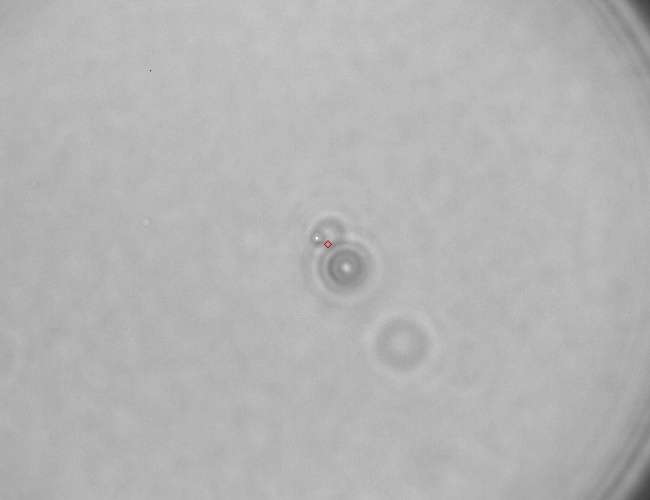

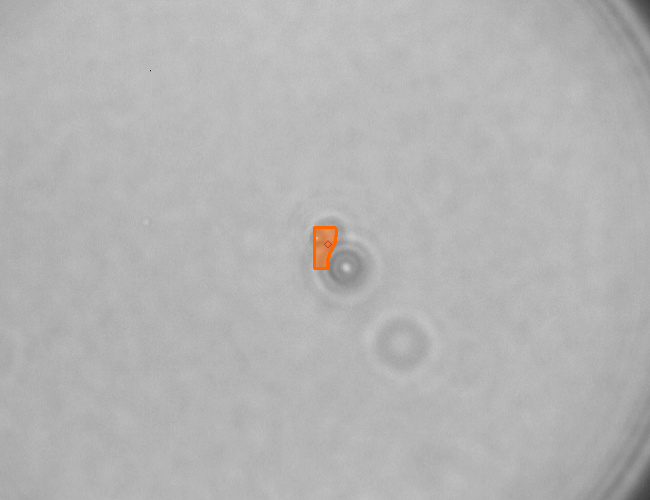

In [10]:
from google.colab.patches import cv2_imshow
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(imgCopy, [cnt], True, colors[i], 2)
        imgCopy = draw_mask(imgCopy, [cnt], colors[i])

cv2_imshow(img)
cv2_imshow(imgCopy)

# **8. Video -> Bilden**

In [11]:
# 必要时清空文件夹
# import shutil  
# shutil.rmtree('/content/frame')  

In [12]:
import cv2
import os


video_path = r'/content/drive/MyDrive/Abschlussarbeit/videoMaterial/63x_Oilimmersion_5%_OrmoComp/2.5%SCA Professor v2.9.4 [fabrication1] 2022-04-04 16-16-53.mp4'
cap = cv2.VideoCapture(video_path)
frame_nums = cap.get(7)   # 获取视频总帧数
print("视频的总帧数为：",int(frame_nums))   
frame_rete = cap.get(5)   # 获取视频帧率
print("视频的帧率为：",int(frame_rete))   

isOpened = cap.isOpened
print(isOpened)

# 创建存帧文件夹
path = os.getcwd() + '/frame/'
# pwd = os.getcwd() + '\\frame\\' + "\\video1\\"
if not os.path.exists(path):
    os.mkdir(path)
    print("directory made")
# elif not os.path.exists(pwd):
#     os.mkdir(pwd)
else:
    print("directory existed")

fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) )
print(fps, width, height)

i = 0
while(isOpened):
    if i == frame_nums:
        break
    else:
        i = i+1
    (flag, frame) = cap.read()
    fileName = '/content/frame/image' + str(i) +'.jpg'
    print(fileName)
    if flag == True:
        cv2.imwrite(fileName, frame, [cv2.IMWRITE_JPEG_QUALITY,100])
print('end')



视频的总帧数为： 1296
视频的帧率为： 30
<built-in method isOpened of cv2.VideoCapture object at 0x7f91203726f0>
directory made
30.05849345717515 1920 1000
/content/frame/image1.jpg
/content/frame/image2.jpg
/content/frame/image3.jpg
/content/frame/image4.jpg
/content/frame/image5.jpg
/content/frame/image6.jpg
/content/frame/image7.jpg
/content/frame/image8.jpg
/content/frame/image9.jpg
/content/frame/image10.jpg
/content/frame/image11.jpg
/content/frame/image12.jpg
/content/frame/image13.jpg
/content/frame/image14.jpg
/content/frame/image15.jpg
/content/frame/image16.jpg
/content/frame/image17.jpg
/content/frame/image18.jpg
/content/frame/image19.jpg
/content/frame/image20.jpg
/content/frame/image21.jpg
/content/frame/image22.jpg
/content/frame/image23.jpg
/content/frame/image24.jpg
/content/frame/image25.jpg
/content/frame/image26.jpg
/content/frame/image27.jpg
/content/frame/image28.jpg
/content/frame/image29.jpg
/content/frame/image30.jpg
/content/frame/image31.jpg
/content/frame/image32.jpg
/cont

# **9. Bild erkennung und imwrit**

In [13]:
import os
# directory-主路径
# fileType-指定文件类型
# fileList-目标类型文件列表（路径+文件名）
def SearchFiles(directory, fileType):      
    fileList=[]    
    for root, subDirs, files in os.walk(directory):
        for fileName in files:
            if fileName.endswith(fileType):
                fileList.append(os.path.join(root,fileName))
    return fileList

In [14]:
directory = '/content/frame/'
fileType = '.jpg'
fileList = SearchFiles(directory, fileType)
print(len(fileList))

imgNumber = len(fileList)

1296


In [15]:
# 创建存 imgCopy 帧文件夹
path = os.getcwd() + '/imgCopy/'

if not os.path.exists(path):
    os.mkdir(path)
    print("directory made")

else:
    print("directory existed")

directory made


In [16]:
for x in range(1, imgNumber+1):
    imgName = '/content/frame/image' + str(x) +'.jpg'
    imgCopyName = '/content/imgCopy/imageCopy' + str(x) +'.jpg'
    img = cv2.imread(imgName)

    imgCopy = img.copy()
    image = cv2.cvtColor(imgCopy, cv2.COLOR_BGR2RGB)

    # Detect results
    r = test_model.detect([image])[0]
    colors = random_colors(80)


    # Ergebnis
    # Get Coordinates and show it on the image
    object_count = len(r["class_ids"])
    for i in range(object_count):
        # 1. Mask
        mask = r["masks"][:, :, i]
        contours = get_mask_contours(mask)
        for cnt in contours:
            cv2.polylines(imgCopy, [cnt], True, colors[i], 2)
            imgCopy = draw_mask(imgCopy, [cnt], colors[i])

    cv2.imwrite(imgCopyName, imgCopy, [cv2.IMWRITE_JPEG_QUALITY,100]) 
    print("x = ", + x)

print("end")

x =  1
x =  2
x =  3
x =  4
x =  5
x =  6
x =  7
x =  8
x =  9
x =  10
x =  11
x =  12
x =  13
x =  14
x =  15
x =  16
x =  17
x =  18
x =  19
x =  20
x =  21
x =  22
x =  23
x =  24
x =  25
x =  26
x =  27
x =  28
x =  29
x =  30
x =  31
x =  32
x =  33
x =  34
x =  35
x =  36
x =  37
x =  38
x =  39
x =  40
x =  41
x =  42
x =  43
x =  44
x =  45
x =  46
x =  47
x =  48
x =  49
x =  50
x =  51
x =  52
x =  53
x =  54
x =  55
x =  56
x =  57
x =  58
x =  59
x =  60
x =  61
x =  62
x =  63
x =  64
x =  65
x =  66
x =  67
x =  68
x =  69
x =  70
x =  71
x =  72
x =  73
x =  74
x =  75
x =  76
x =  77
x =  78
x =  79
x =  80
x =  81
x =  82
x =  83
x =  84
x =  85
x =  86
x =  87
x =  88
x =  89
x =  90
x =  91
x =  92
x =  93
x =  94
x =  95
x =  96
x =  97
x =  98
x =  99
x =  100
x =  101
x =  102
x =  103
x =  104
x =  105
x =  106
x =  107
x =  108
x =  109
x =  110
x =  111
x =  112
x =  113
x =  114
x =  115
x =  116
x =  117
x =  118
x =  119
x =  120
x =  121
x =  122
x =  123
x

In [17]:
from google.colab.patches import cv2_imshow


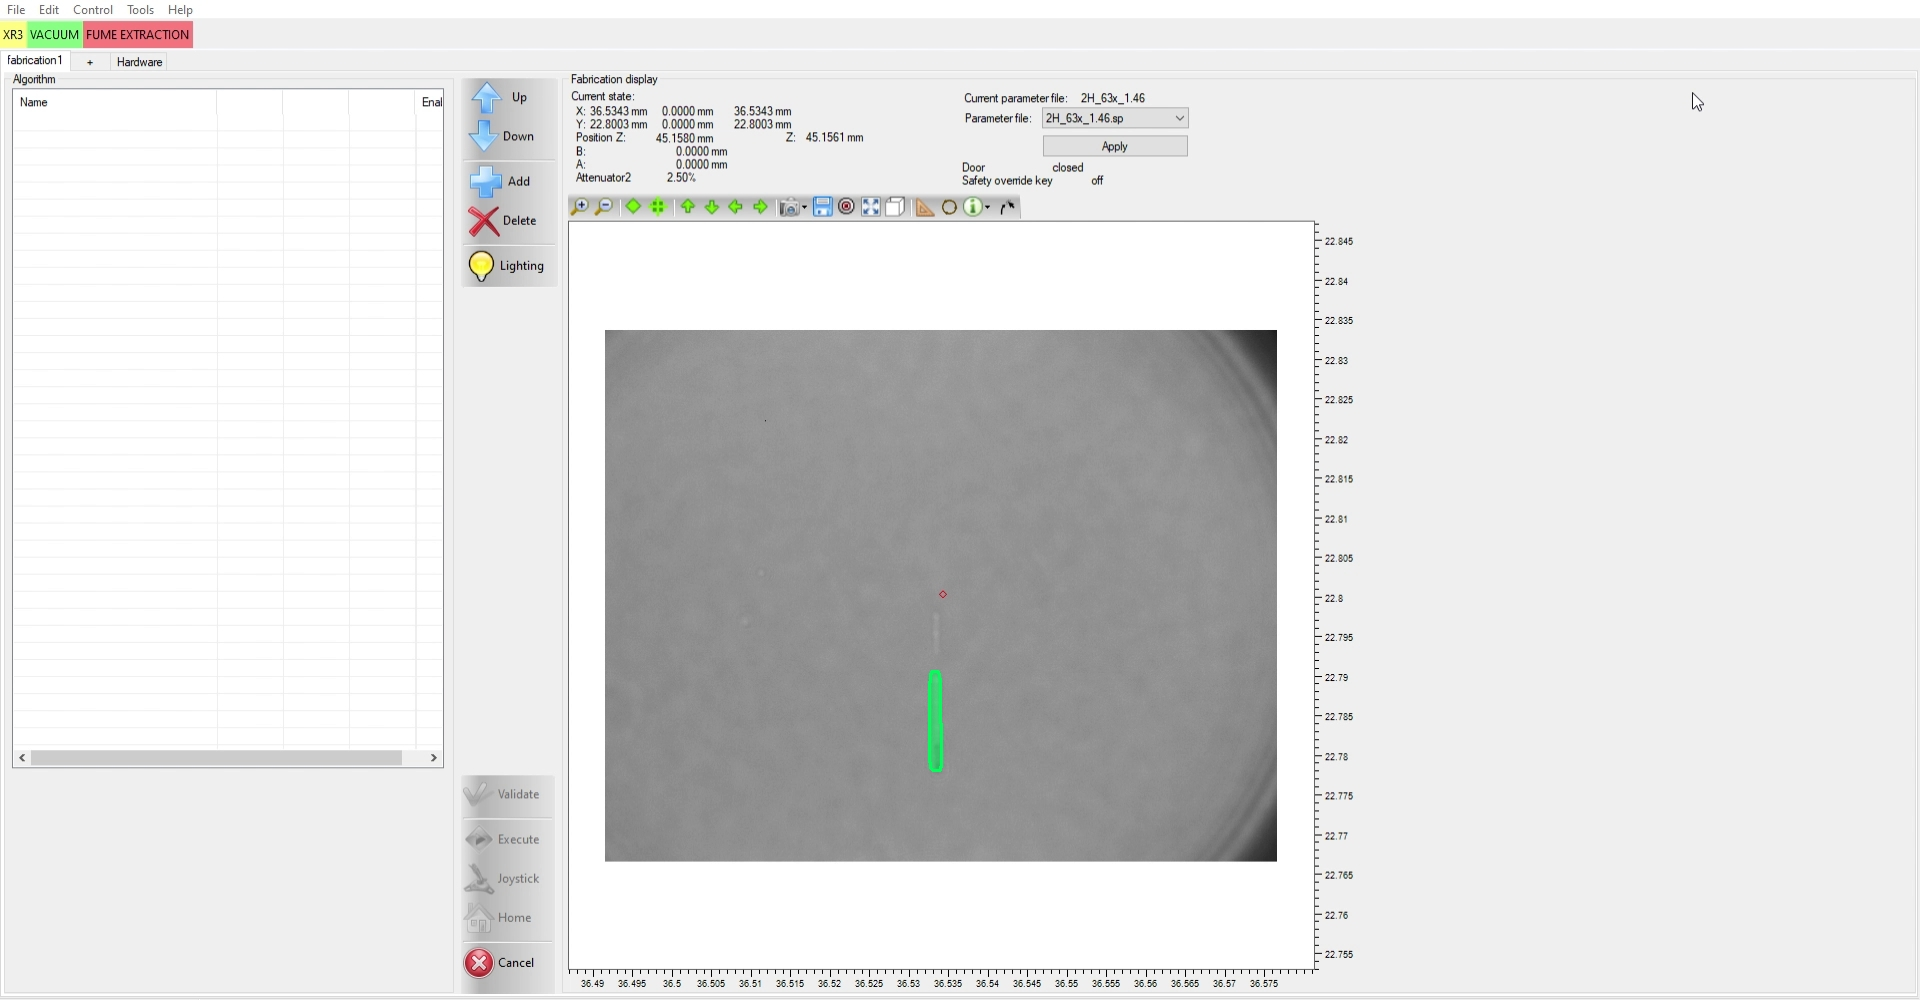

In [18]:
imgProb = cv2.imread("/content/imgCopy/imageCopy1280.jpg")
cv2_imshow(imgProb)

# **10. Bilde -> Video**

In [20]:

# 创建存 output.mp4 帧文件夹
path = os.getcwd() + '/output/'

if not os.path.exists(path):
    os.mkdir(path)
    print("directory made")

else:
    print("directory existed")

directory made


In [24]:
import cv2

directory = '/content/imgCopy/'
fileType = '.jpg'
fileList = SearchFiles(directory, fileType)
print(len(fileList))

imgNumber = len(fileList)

#获取一张图片的宽高作为视频的宽高
imageErst=cv2.imread('/content/imgCopy/imageCopy1.jpg')
# cv2.imshow("new window", imageErst)   #显示图片
# cv2.waitKey(5000)
# cv2.destroyAllWindows()
image_info=imageErst.shape
size=(image_info[1],image_info[0])
print(size)
fps=30
# fourcc=cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
fourcc = -1
# video = cv2.VideoWriter('ss.avi', fourcc, fps, size, isColor=False) #创建视频流对象-格式一
# cv2.VideoWriter_fourcc(*"MJPG")
video = cv2.VideoWriter('/content/output/output.mp4', fourcc, fps, size, isColor=True) #创建视频流对象-格式二

"""
参数1 即将保存的文件路径
参数2 VideoWriter_fourcc为视频编解码器
    fourcc意为四字符代码（Four-Character Codes），顾名思义，该编码由四个字符组成,下面是VideoWriter_fourcc对象一些常用的参数,注意：字符顺序不能弄混
    cv2.VideoWriter_fourcc('I', '4', '2', '0'),该参数是YUV编码类型，文件名后缀为.avi 
    cv2.VideoWriter_fourcc('P', 'I', 'M', 'I'),该参数是MPEG-1编码类型，文件名后缀为.avi 
    cv2.VideoWriter_fourcc('X', 'V', 'I', 'D'),该参数是MPEG-4编码类型，文件名后缀为.avi 
    cv2.VideoWriter_fourcc('T', 'H', 'E', 'O'),该参数是Ogg Vorbis,文件名后缀为.ogv 
    cv2.VideoWriter_fourcc('F', 'L', 'V', '1'),该参数是Flash视频，文件名后缀为.flv
    cv2.VideoWriter_fourcc('m', 'p', '4', 'v')    文件名后缀为.mp4
参数3 为帧播放速率
参数4 (width,height)为视频帧大小

"""
for i in range(1,imgNumber+1):
    file_name = '/content/imgCopy/imageCopy' + str(i) + '.jpg'
    print(file_name)
    image=cv2.imread(file_name)
#     cv2.imshow("new window2", image)   #显示图片
#     cv2.waitKey(5000)
#     cv2.destroyAllWindows()
    video.write(image)  # 向视频文件写入一帧--只有图像，没有声音
print('end')

1296
(1920, 1000)
/content/imgCopy/imageCopy1.jpg
/content/imgCopy/imageCopy2.jpg
/content/imgCopy/imageCopy3.jpg
/content/imgCopy/imageCopy4.jpg
/content/imgCopy/imageCopy5.jpg
/content/imgCopy/imageCopy6.jpg
/content/imgCopy/imageCopy7.jpg
/content/imgCopy/imageCopy8.jpg
/content/imgCopy/imageCopy9.jpg
/content/imgCopy/imageCopy10.jpg
/content/imgCopy/imageCopy11.jpg
/content/imgCopy/imageCopy12.jpg
/content/imgCopy/imageCopy13.jpg
/content/imgCopy/imageCopy14.jpg
/content/imgCopy/imageCopy15.jpg
/content/imgCopy/imageCopy16.jpg
/content/imgCopy/imageCopy17.jpg
/content/imgCopy/imageCopy18.jpg
/content/imgCopy/imageCopy19.jpg
/content/imgCopy/imageCopy20.jpg
/content/imgCopy/imageCopy21.jpg
/content/imgCopy/imageCopy22.jpg
/content/imgCopy/imageCopy23.jpg
/content/imgCopy/imageCopy24.jpg
/content/imgCopy/imageCopy25.jpg
/content/imgCopy/imageCopy26.jpg
/content/imgCopy/imageCopy27.jpg
/content/imgCopy/imageCopy28.jpg
/content/imgCopy/imageCopy29.jpg
/content/imgCopy/imageCopy30.jpg
/

# **11. Download Video**

In [25]:
import os
import shutil

# srcfile 需要复制、移动的文件   
# dstpath 目的地址
 
def mycopyfile(srcfile,dstpath):                       # 复制函数
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(srcfile)             # 分离文件名和路径
        if not os.path.exists(dstpath):
            os.makedirs(dstpath)                       # 创建路径
        shutil.copy(srcfile, dstpath + fname)          # 复制文件
        print ("copy %s -> %s"%(srcfile, dstpath + fname))
 
 
# src_dir = './'

In [26]:
mycopyfile('/content/output/output.mp4', '/content/drive/MyDrive/Abschlussarbeit/videoErgebnis/')

copy /content/output/output.mp4 -> /content/drive/MyDrive/Abschlussarbeit/videoErgebnis/output.mp4


# **9.5 ZIP imgCopy**

In [19]:
import os
import zipfile
 
 
def zipDir(dirpath, outFullName):
    """
    压缩指定文件夹
    :param dirpath: 目标文件夹路径
    :param outFullName: 压缩文件保存路径+xxxx.zip
    :return: 无
    """
    zip = zipfile.ZipFile(outFullName, "w", zipfile.ZIP_DEFLATED)
    for path, dirnames, filenames in os.walk(dirpath):
        # 去掉目标跟路径，只对目标文件夹下边的文件及文件夹进行压缩
        fpath = path.replace(dirpath, '')
 
        for filename in filenames:
            zip.write(os.path.join(path, filename), os.path.join(fpath, filename))
    zip.close()
 
 
if __name__ == "__main__":
    input_path = "/content/imgCopy"
    output_path = "/content/drive/MyDrive/Abschlussarbeit/videoErgebnis/test.zip"
 
    zipDir(input_path, output_path)